In [1]:
from __future__ import absolute_import, division, print_function

%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.dropout import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.0.2


In [2]:
env = BerBandit(np.asarray([0.8, 0.2]))
print(env.print())
print(" E[r] = %s" % " ".join(["%.2f" % val for val in env.mu]))
print("a*(x) = %d" % env.best_arm)
for trial in range(5):
  env.randomize()
  print("    r = %s" % " ".join(["%.2f" % val for val in env.rt]))
print()

env = BetaBandit(np.asarray([0.8, 0.2]))
print(env.print())
print(" E[r] = %s" % " ".join(["%.2f" % val for val in env.mu]))
print("a*(x) = %d" % env.best_arm)
for trial in range(5):
  env.randomize()
  print("    r = %s" % " ".join(["%.2f" % val for val in env.rt]))

Bernoulli bandit with arms (0.800, 0.200)
 E[r] = 0.80 0.20
a*(x) = 0
    r = 1.00 0.00
    r = 1.00 1.00
    r = 1.00 0.00
    r = 1.00 1.00
    r = 1.00 0.00

Beta bandit with arms (0.800, 0.200)
 E[r] = 0.80 0.20
a*(x) = 0
    r = 0.95 0.04
    r = 0.79 0.36
    r = 0.86 0.00
    r = 0.73 0.09
    r = 0.67 0.16


In [ ]:
import datetime

algs = [
  #("UCB1", {}, "cyan", "-", "UCB1"),
  #("KLUCB", {}, "blue", "-", "KL-UCB"),
  ("TS", {}, "gray", "-", "TS"),
  #("Giro", {}, "greenyellow", "-", "Giro"),
  #("FPL", {}, "green", "-", "FPL"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
  ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
  ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  ("HistorySwapping", {"swap_prob": 0.1}, "black", "-", "HS (swap_prob = 0.1)"),
  ("HistorySwapping", {"swap_prob": 0.05}, "green", "-", "HS (swap_prob = 0.05)"),
  ("HistorySwapping", {"swap_prob": 0.02}, "blue", "-", "HS (swap_prob = 0.02)"),
]
num_runs = 50
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(5.5, 2))
for fig in range(1,2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(GaussBandit(mu, sigma=0.2))

  #plt.subplot(1, 2, fig + 1)
  plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate(alg_class, alg[1], env, n)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 4 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Gauss bandit")
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret")
  #plt.ylim(0, 400)
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("results/PHE_HS_{}_{}.pdf".format(now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

Evaluating PHE.................................................. 71.2 seconds
Regret: 148.54 +/- 7.58 (median: 147.00, max: 335.00, min: 60.00)
Evaluating PHE.................................................. 71.4 seconds
Regret: 182.60 +/- 50.62 (median: 35.50, max: 1455.00, min: 6.00)
Evaluating Histroy-Swapping.................................................. 45.1 seconds
Regret: 252.64 +/- 60.13 (median: 48.50, max: 2031.00, min: 19.00)
Evaluating Histroy-Swapping.................................................. 108.7 seconds
Regret: 206.42 +/- 29.88 (median: 113.00, max: 1089.00, min: 64.00)
Evaluating Histroy-Swapping.................................................. 190.9 seconds
Regret: 257.70 +/- 30.66 (median: 174.00, max: 1334.00, min: 92.00)
Evaluating PHE.................................................. 89.2 seconds
Regret: 143.74 +/- 3.88 (median: 144.21, max: 211.80, min: 88.47)
Evaluating PHE.................................................. 91.9 seconds
Regret: 58.7

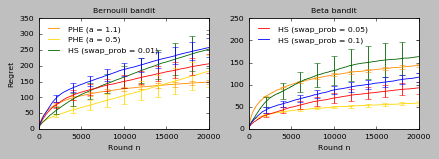

In [6]:
import datetime

algs = [
  #("UCB1", {}, "cyan", "-", "UCB1"),
  #("KLUCB", {}, "blue", "-", "KL-UCB"),
  #("TS", {}, "gray", "-", "TS"),
  #("Giro", {}, "greenyellow", "-", "Giro"),
  #("FPL", {}, "green", "-", "FPL"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
  ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
  ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  #("HistorySwapping", {"swap_prob": 0.}, "gray", "-", "HS (swap_prob = 0.)"),
  ("HistorySwapping", {"swap_prob": 0.01}, "darkgreen", "-", "HS (swap_prob = 0.01)"),
  ("HistorySwapping", {"swap_prob": 0.05}, "red", "-", "HS (swap_prob = 0.05)"),
  ("HistorySwapping", {"swap_prob": 0.1}, "blue", "-", "HS (swap_prob = 0.1)"),
  #("HistorySwapping_MD", {"swap_prob": 0.01}, "red", "-", "HS_MD (swap_prob = 0.01)"),
  #("HistorySwapping", {"swap_prob": 0.02}, "black", "-", "HS (swap_prob = 0.02)"),
  #("FreshHistorySwapping", {"swap_prob": 0.}, "yellow", "-", "FHS (swap_prob = 0.)"),
  #("FreshHistorySwapping", {"swap_prob": 0.01}, "blue", "-", "FHS (swap_prob = 0.01)"),
  #("FreshHistorySwapping", {"swap_prob": 0.02}, "red", "-", "FHS (swap_prob = 0.02)"),
  #("FreshHistorySwapping", {"swap_prob": 0.03}, "darkgreen", "-", "FHS (swap_prob = 0.03)"),
  #("EpsilonGreedy", {}, "darkgreen", "-", "EpsilonGreedy"),
  #("DropoutExploration", {}, "blue", "-", "Dopout (drop_prob = epsilon)"),
  #("DropoutExploration", {"drop_prob": 0.1}, "red", "-", "Dopout (drop_prob = 0.1)"),
  #("DropoutExploration", {"drop_prob": 0.15}, "cyan", "-", "Dopout (drop_prob = 0.15)"),
]
num_runs = 50
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(5.5, 2))
for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate(alg_class, alg[1], env, n)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 3 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret")
  #plt.ylim(0, 400)
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("results/FHS_{}_{}.jpeg".format(now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()